In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigvals, inv, eig
%matplotlib inline

In [29]:
def main(f = 1.0, m1 = 0.4, m2 = 1.0, **kwargs):
    # mat1 == F
    mat1 = lambda q: np.array([[             2*f,   -f,    0,-f * np.exp(-1j*q)],
                               [               -f, 2*f,   -f,                 0],
                               [                0,  -f,  2*f,                -f],
                               [-f * np.exp(1j*q),   0,   -f,              2*f]])
    
    massmat = np.diag([m1, m1, m1, m2])
    # mat2 == M-1 * F, not a Hermitian Matrix
    mat2 = lambda q: inv(massmat).dot(mat1(q))
    plot_step = kwargs.get('plot_step', np.pi/50)
    x_axis = np.arange(-np.pi, np.pi, plot_step)
    
    eigenlist = [eigvals(mat2(x)) for x in x_axis]
    eigenlist = np.array(eigenlist, complex)
    eigenlist = np.abs(eigenlist)
    omega = np.sqrt(eigenlist)             
    
    plt.plot(x_axis,omega[:,0], '.')
    plt.plot(x_axis,omega[:,1], '.')
    plt.plot(x_axis,omega[:,2], '.')
    plt.plot(x_axis,omega[:,3], '.')
    plt.xlabel('q')
    plt.ylabel('$\omega$')
    plt.xticks(np.linspace(-np.pi, np.pi+np.pi/50,5),
               [r"$\pi$", r"$\frac{\pi}{2}$", "0", r"$\frac{\pi}{2}$",
                r"$\pi$"])
    plt.show()
    
    eigensys = eig(mat2(0.0))
    eigenvalues = eigensys[0]
    eigenvector = eigensys[1]
    return eigenvalues,eigenvector

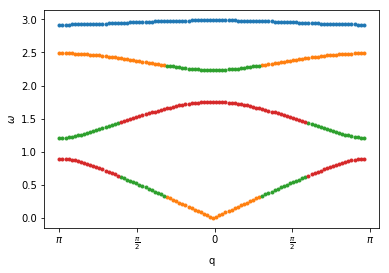

In [33]:
if __name__ == "__main__":
    e_val, e_vec = main(m1 = 0.4, m2 = 1.0)
    #print(e_val)
    #print(e_vec)

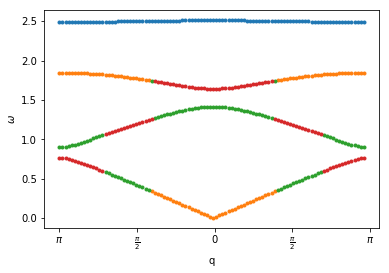

In [34]:
if __name__ == "__main__":
    e_val, e_vec = main(m1 = 1.0, m2 = 0.4)
    #print(e_val)
    #print(e_vec)

In [27]:
# interchanging the values of m1 and m2 will interchange the frequency values of two out of the four eigenmodes
# it will also change the eigenvalues and the eigenvectors

In [28]:
# changing the value of f will also change the range of the frequency value. Increasing f will increase the frequency
# f is the spring constant